## Import Package

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from jcopml.plot import plot_actual_vs_prediction, plot_confusion_matrix, plot_classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

C:\Users\Ridho Alhafizhi\Anaconda2\envs\uika\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Import Dataset

In [147]:
df = pd.read_excel("output_cluster.xlsx", index_col="no")
df.head()

,produksi,asset,penjualan,pekerja,kategori
no,,,,,
293,20,35000000,9000000,3,0
371,750,38000000,5250000,2,0
385,1200,34600000,12000000,5,0
388,4,30000000,15000000,2,0
532,75,46500000,6250000,1,0


In [148]:
df.loc[df['kategori'] == 0, 'kategori'] = "Besar"
df.loc[df['kategori'] == 1, 'kategori'] = "Menengah"
df.loc[df['kategori'] == 2, 'kategori'] = "Kecil"

df.head()

,produksi,asset,penjualan,pekerja,kategori
no,,,,,
293,20,35000000,9000000,3,Besar
371,750,38000000,5250000,2,Besar
385,1200,34600000,12000000,5,Besar
388,4,30000000,15000000,2,Besar
532,75,46500000,6250000,1,Besar


## Dataset Splitting

In [149]:
X = df.drop(columns="kategori")
y = df.kategori

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1896, 4), (475, 4), (1896,), (475,))

## Preprocessor dan Training

In [150]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'),X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   26.9s


{'algo__n_neighbors': 7, 'algo__p': 1, 'algo__weights': 'distance'}
1.0 0.9878739064018888 0.9894736842105263


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   30.0s finished


## Evaluasi Model

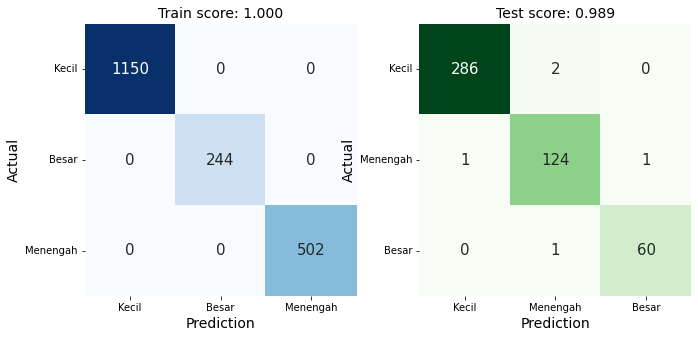

In [151]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## Prediksi Data Baru

In [155]:
#masukan data baru yg akan diprediksi dan sesuai kolom
data = [
    [1800, 10000000, 7000000, 4],
    [1000, 1000000, 700000, 2],
    [10, 200000, 250000, 1],
    [1700, 34000000, 250000, 1]
]

#menampilkan data baru dalam bentuk data frame
X_pred = pd.DataFrame(data, index=["1","2","3","4"], columns=X_train.columns)
X_pred

#melakukan prediksi
X_pred["prediksi"] = model.predict(X_pred)
X_pred

,produksi,asset,penjualan,pekerja,prediksi
1,1800,10000000,7000000,4,Menengah
2,1000,1000000,700000,2,Kecil
3,10,200000,250000,1,Kecil
4,1700,34000000,250000,1,Besar


## Save Model

In [154]:
save_model(model, "klasifikasi-umkm.pkl")

Model is pickled as model/klasifikasi-umkm.pkl
